In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.io import loadmat

import warnings
warnings.filterwarnings("ignore")

In [100]:
data_at4 = loadmat('Données/data_at4.mat') 
#X=data_at4["X"]

data_at4


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Apr 08 17:53:04 2009',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[1.00000000e+00, 6.08560000e+00, 2.27959000e+01, 6.45476000e+01,
         1.29100000e-01, 1.03606800e+02],
        [2.00000000e+00, 7.43400000e-01, 1.39185000e+01, 6.24890000e+00,
         7.86400000e-01, 2.55742000e+01],
        [3.00000000e+00, 3.76330000e+00, 1.29093000e+01, 1.58831000e+01,
         3.55000000e-02, 4.11653000e+01],
        [4.00000000e+00, 1.01553784e+01, 1.83789774e+01, 1.60608646e+01,
         4.89676869e+00, 5.31484309e+01],
        [5.00000000e+00, 7.14800000e+00, 1.45234000e+01, 2.21192000e+01,
         8.50900000e-01, 5.44129000e+01],
        [6.00000000e+00, 1.99995355e+00, 2.55951827e+01, 6.79087295e+01,
         5.47055081e+00, 9.68436081e+01],
        [7.00000000e+00, 4.00170000e+00, 1.42852000e+01, 1.49783000e+01,
         8.91400000e-01, 4.03928000e+01],
        [8.00000000e+00, 5.18980000e+00, 1.1232800

In [101]:
data=data_at4["data"]
data_df=pd.DataFrame(data)
data_df

X=data_df.drop([5], axis=1)

Y=data_df[5]



In [102]:
# Analyse des corrélations entre les varaiables
mat_coor=pd.DataFrame(np.corrcoef(data))
print(mat_coor)

          0         1         2         3         4         5         6   \
0   1.000000  0.839432  0.958569  0.909340  0.965596  0.994477  0.934938   
1   0.839432  1.000000  0.946701  0.952738  0.920428  0.821753  0.956354   
2   0.958569  0.946701  1.000000  0.984474  0.996928  0.938116  0.994499   
3   0.909340  0.952738  0.984474  1.000000  0.980871  0.875573  0.977521   
4   0.965596  0.920428  0.996928  0.980871  1.000000  0.942414  0.988811   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.592948  0.480388  0.598574  0.509583  0.616700  0.605766  0.651909   
96  0.574725  0.410066  0.546791  0.441155  0.567155  0.597574  0.595856   
97  0.702812  0.498634  0.658485  0.555820  0.681770  0.720508  0.692476   
98 -0.105205 -0.036053 -0.035977 -0.101588 -0.031212 -0.081453  0.057266   
99  0.598103  0.494448  0.601002  0.505499  0.614739  0.616602  0.655399   

          7         8         9   ...        90        91        92        93  \
0   0.

Nous avons que cette matrice des coefficients de correlation entre les variables est différente de la matrice identité donc nous pouvons dire que nos variables sont corrélées entre elles. Donc il est pertinent d'appliquer une regression linéaire sur ces données

**Modélisation par regression linéaire: Moindres carré**

In [103]:
import numpy as np
from numpy.linalg import inv


In [104]:
mat_X=X.values # on raméne le dataframe X en matrice
mat_X

matX=np.hstack((np.ones((mat_X.shape[0], 1)), mat_X)) # on rajoute une colonne de 1 à la matrice des variables explicatives
X_transpose = np.transpose(matX)
theta = np.dot(inv(np.dot(X_transpose, matX)), np.dot(X_transpose, Y)) # on calcule l'estimation 
print(theta)

# On calcule y chapo par la formumle analytique des moindres carrés
y_chapo = np.dot(matX, theta)


[ 1.21348927e+01 -1.97408835e-04  1.44407791e+00  7.04339101e-01
  9.99146518e-01 -1.70877795e+00]


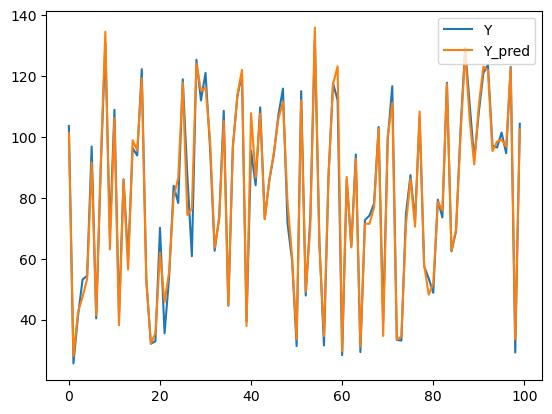

In [115]:
#On trace sur une meme figure y et y_chapo

plt.plot(Y, label="Y")
plt.plot(y_chapo, label="Y_pred")
plt.legend()
plt.show()

4.799360908691597e-13


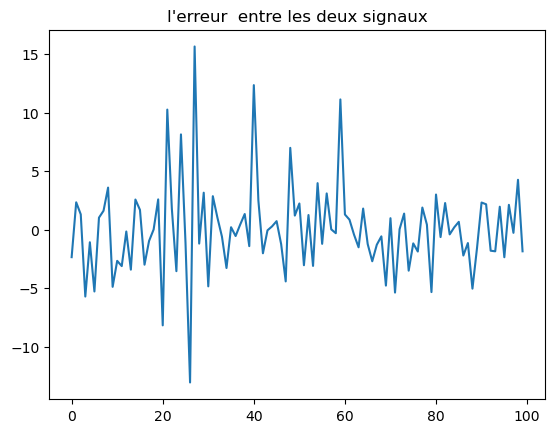

In [118]:
#On représente l'erreur epsilon 

eps=y_chapo-Y

print(np.mean(eps))
plt.plot(eps)
plt.title("l'erreur  entre les deux signaux")
plt.show()

On souhaite améliorer l'estimation en supprimant les données anormales (valeurs aberrantes, ...)

C:\Users\michel.dione\AppData\Local\Temp\ipykernel_19792\2502109672.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color='red')


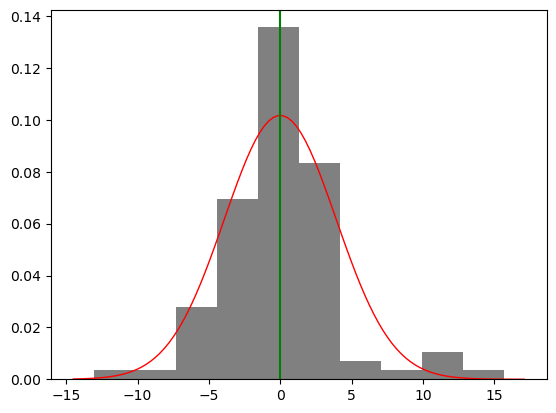

In [107]:
from scipy.stats import norm

v= np.var(eps) ; m=eps.mean()

plt.hist(eps, density=True, color='gray')

mu, std = norm.fit(eps) # Ajustement de la courbe de densité avec une distribution normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, color='red')
plt.axvline(x=m,color='green')
plt.show()


Nous pouvons constater sur ce graphe  que l'erreur a une distribution quasiment normale.

D'aprés l'atelier 1, on a que, si on supprime les valeurs aberrantes on obtient, avec les données nettoyées, que la distribution se rapproche plus d'une distribution normale qu'avec les données brutes. 

Ainsi donc nous pouvons essayer de nettoyer nos données en supprimant les valeurs aberrantes


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

On fait la modélisation à l'aide des méthodes définies dans python

2.1316282072803005e-15


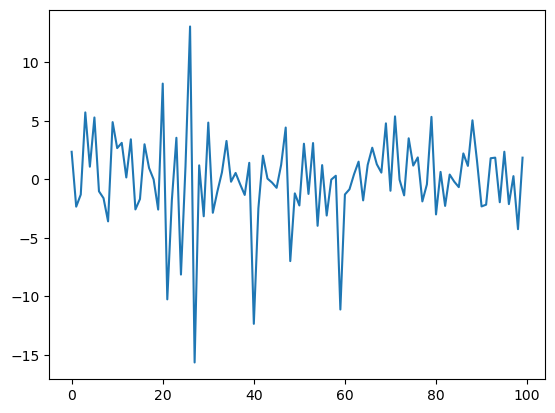

In [119]:

# initialisation du modèle
rlg = LinearRegression()
# On adapte les données (entraînement du modèle)
rlg.fit(X, Y)

y_pred=rlg.predict(X)

eps2=Y-y_pred

plt.plot(eps2)

print(eps2.mean())

C:\Users\michel.dione\AppData\Local\Temp\ipykernel_19792\2106149330.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color='red')


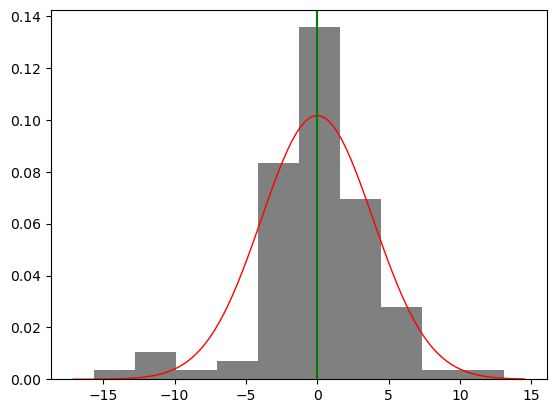

In [121]:
v2= np.var(eps2) ; m2=eps2.mean()

plt.hist(eps2, density=True, color='gray')

mu, std = norm.fit(eps2) # Ajustement de la courbe de densité avec une distribution normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, color='red')
plt.axvline(x=m,color='green')
plt.show()


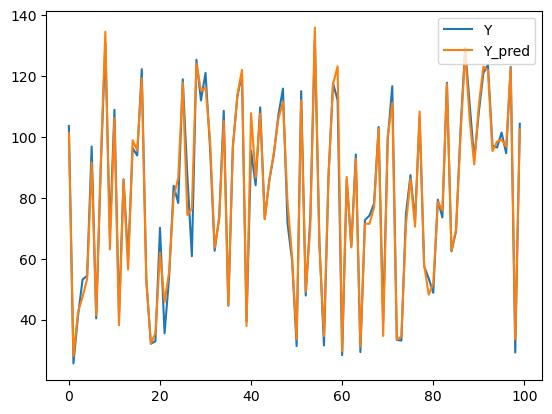

In [116]:
plt.plot(Y, label="Y")
plt.plot(y_pred, label="Y_pred")
plt.legend()
plt.show()

Nous pouvons remarquer que les résultats de ces deux procédés sont pratiquement pareils.